ridgetrain_y
pred!
ROOT MEAN SQUARE VALUE FOR LAMBDA 0.1  is:  0.032577670293573044


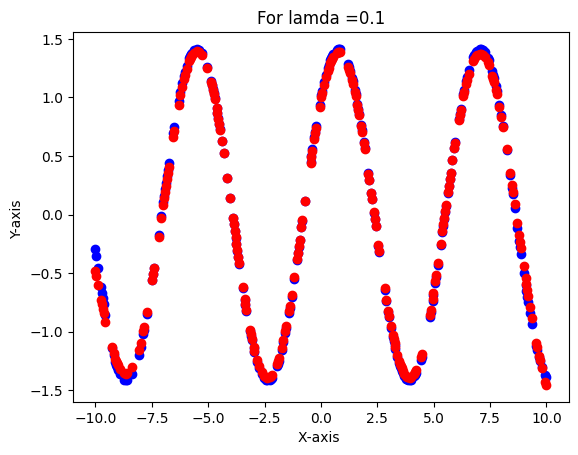

pred!
ROOT MEAN SQUARE VALUE FOR LAMBDA 1  is:  0.17030390344202528


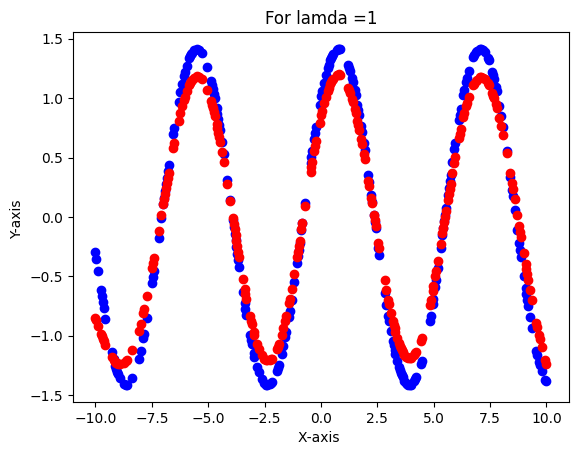

pred!
ROOT MEAN SQUARE VALUE FOR LAMBDA 10  is:  0.6092671596540066


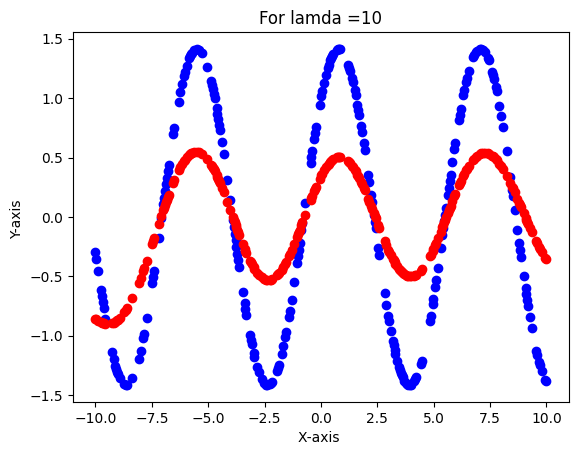

pred!
ROOT MEAN SQUARE VALUE FOR LAMBDA 100  is:  0.9110858052767243


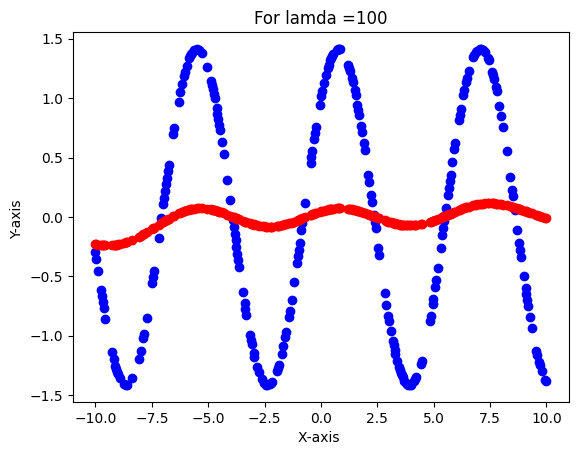

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
import random

# ridgetest = "ridgetest.txt"
# ridgetrain = "ridgetrain.txt"

ridgetest = "ridgetest.txt"
ridgetrain = "ridgetrain.txt"
try:
    with open(ridgetrain, "r") as file:
        # Read the contents of the file
        ridgetrain_content = file.read()
        words = ridgetrain_content.split()
        # print(words)
        # print("entered!!!!")
        x = []
        y = []
        ridgetrain_x = []
        ridgetrain_y = []
        for j in range(0, len(words), 2):
            for i in range(2):
                if i ==0:
                    ridgetrain_x.append(words[j+i])
                if i ==1:
                    ridgetrain_y.append(words[j+i])
        # print(x)
        # print(y)
        print("ridgetrain_y")
        # print(ridgetrain_y)
        list_of_list = []
        for i,j in zip(ridgetrain_x,ridgetrain_y):
            # print(i,j)
            temp = []
            i_int = float(i)
            j_int = float(j)
            temp.append(i_int)
            temp.append(j_int)
            list_of_list.append(temp)
        # print(list_of_list)
        # print(y)




except FileNotFoundError:
    print(f"The file {file_path} does not exist.")
except Exception as e:
    print(f"An error occurred: {e}")



# x_n = list_of_list[0][0]
# x_m = list_of_list[1][0]
def rbf_kernel(x_n,x_m):
    gamma = 0.1
    rbf = math.exp(-1*gamma*(np.linalg.norm(x_n-x_m)**2))
    return rbf
# print(np.linalg.norm(x_n-x_m)**2)


lamda_list = [0.1,1,10,100]

for index in lamda_list:
    # kernel_matrix = []
    kernel_matrix = np.zeros((len(list_of_list), len(list_of_list)), dtype=float)
    for i in range(len(list_of_list)):
        for j in range(len(list_of_list)):
            kernel_matrix[i][j] = rbf_kernel(list_of_list[i][0],list_of_list[j][0])
            # print(rbf_kernel(list_of_list[i][0],list_of_list[j][0]),end=" ")
        # print()
    # print("kernel_matrix")

    # print(kernel_matrix)

    # print(twoD_rbf)

    ridgetrain_y_labels =[float(i) for i in  ridgetrain_y]
    identity_matrix = np.identity(len(list_of_list))


    lamda = index
    k = np.array(kernel_matrix)
    # print("qwertyui")
    # print(identity_matrix.shape)
    # print(k.shape)

    ridgetrain_y_labels_np = np.array(ridgetrain_y_labels)
    W = np.linalg.inv((identity_matrix*lamda)+k)
    # print("WWWWW",W)
    W = np.dot(W,ridgetrain_y_labels_np)
    # print(W)
    try:
        with open(ridgetest, "r") as file:
            # Read the contents of the file
            ridgetest_content = file.read()
            words = ridgetest_content.split()
            # print(words)
            ridgetest_x = []
            ridgetest_y = []
            for j in range(0, len(words), 2):
                for i in range(2):
                    if i ==0:
                        ridgetest_x.append(float(words[j+i]))
                    if i ==1:
                        ridgetest_y.append(float(words[j+i]))
            list_of_list_test = []
            for i,j in zip(ridgetest_x,ridgetest_y):
                # print(i,j)
                temp = []
                i_int = float(i)
                j_int = float(j)
                temp.append(i_int)
                temp.append(j_int)
                list_of_list_test.append(temp)
            # print(ridgetest_y)
    except FileNotFoundError:
        print(f"The file {file_path} does not exist.")

    pred=[]
    for i in range(len(list_of_list_test)):
        v_star=[]
        for j in range(len(list_of_list)):
            v_star.append(rbf_kernel(list_of_list_test[i][0],list_of_list[j][0]))
        pred.append(np.dot(W.T,v_star))


    # print(pred)
    print("pred!")
    # print(ridgetest_x)
    # print(ridgetest_y)


    # Convert lists to NumPy arrays
    # ridgetest_y_np = np.array(ridgetest_y)
    # pred_np = np.array(pred)

    # # Calculate the root mean square
    # rms = np.sqrt(np.mean(np.square(np.concatenate((pred_np, ridgetest_y_np)))))
    # print("rms")
    # print(rms)

    # RMS
    sum =0
    for i in range(0,len(pred)):
        sum += (list_of_list_test[i][1]-pred[i])**2
    MSE = sum/len(pred)
    RSME = math.sqrt(MSE)

    print("ROOT MEAN SQUARE VALUE FOR LAMBDA", lamda," is: ", RSME)

    plt.scatter(ridgetest_x,ridgetest_y, marker='o', c='blue')
    plt.scatter(ridgetest_x,pred, marker='o', c='red')
    # Customize the plot
    plt.title('For lamda ='+str(index))
    plt.xlabel('X-axis ')
    plt.ylabel('Y-axis ')
    # Show the plot
    plt.show()







    # except Exception as e:
    #     print(f"An error occurred: {e}")

    # # prediction
    # # for i in range(len(ridgetest_y)):


    # # print(twoD_rbf)